<a href="https://colab.research.google.com/github/TJ-Solergibert/Analisis-modelos-PIV/blob/main/An%C3%A1lisis_de_modelos_PIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis de modelos PIV


##Introducción

Esto es un Notebook creado para optimizar los modelos desarrollados correspondientes al proyecto "Prog0" de la asignatura de PIV. En el se encuentran varias herramientas para analizar el rendimiento de los modelos creados a partir de los archivos generados con los resultados del modelo en formato *.txt*. 

**Aspectos a tener en cuenta:**

*   El Notebook esta adaptado para trabajar con ficheros *.txt* con la misma estructura que el entregado como ejemplo por la universidad (En Atenea PIV > Prog01 > Test > output.txt). En resumen, el modelo ha de generar un archivo *.txt* con 12 lineas por query: La primera el título de la query, seguida de las 10 predicciones (1 por linea) y una línea en blanco. Si no se respeta esta estructura es posible que el programa falle.
*   El programa tiene un mecanismo para detectar cuantas querys contiene el fichero *.txt*. Esto quiere decir que puedes procesar simultaneamente los outputs de varios modelos con distinto número de querys.
*   En caso de detectar algún error o querer formular alguna sugerencia no dudes en ponerte en contacto conmigo a traves de la siguiente dirección de correo electrónico: **antoni-joan.solergibert@estudiantat.upc.edu**





**Mejoras**

*   Implantar una función que muestre por pantalla las imagenes que mas ha confundido para poder analizarlas mejor



##Código

En los siguientes apartados se encuentra todo el código. Gran parte de el esta acompañado de diferentes anotaciones.


1.   Ejecutamos la celda correspondiente al apartado "Librerias y config" para importar las librerias que utilizará el programa.

2.   Ejecutamos la celda correspondiente al apartado "Importar archivos". Al ejecutarla aparecerá un botón para seleccionar los archivos que procesará el programa. Si indagamos un poco por GoogleColab, a la izquierda se encuntra el menú de archivos del proyecto. Una vez subidos los archivos debería aparecer una carpeta llamada "Outputs" con los archivos que hemos subido. Tambien es posible subirlos de forma manual.
 
3.   Ejecutamos las celdas correspondientes al apartado "Funciones Auxiliares". En este apartado se ecnuentran varias funciones que se han desarrollado con sus respectivas descripciones. 

4.   Ejecutamos la celda correspondiente al apartado "Visualizar data". En este apartado podremos observar las estadísticas de cada modelo acompañado de un gráfico.






###Librerias y config

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import sys
np.set_printoptions(threshold=sys.maxsize)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

###Importar archivos

In [ ]:
from google.colab import files

os.mkdir('Outputs')                                                             #Creamos la carpeta que contendrá los .txt
OUTPUTS_FOLDER = os.path.join(os.getcwd(), "Outputs")                           #Creamos un string que contiene el directorio de la carpeta que hemos creado
os.chdir(OUTPUTS_FOLDER)                                                        #Nos introducimos en el directorio de la carpeta 
files.upload()                                                                  #Subimos los archivos .txt
os.chdir('..')                                                                  #Regresamos al directorio anterior

Saving cityblock_16.txt to cityblock_16.txt
Saving cityblock_18.txt to cityblock_18.txt
Saving cityblock_20.txt to cityblock_20.txt


###Funciones auxiliares


In [ ]:
def clean_list(list): 
  """
  A esta funcion le pasamos como argunmento una lista con los nombres de las 
  imagenes predecidas y devuelve otra lista con los IDs de las imaganes

  Parameters
  ----------
  list: Una lista que contiene el nombre de las imagenes predecidas del estilo "ukbench00692.jpg "
  
  Returns
  -------
  new_list: Una lista que contiene las IDs de las imaganes predecidas del estilo "692"
  """
  new_list = []
  for element in list:                                                          #Por cada foto de la lista
    new_element = int(element[7:12])                                            #Agarramos los digitos del 7 al 12 y lo casteamos como un int
    new_list.append(new_element)
  return new_list

In [ ]:
def calc_precision_recall(query):
  """
  A partir de una lista que contiene las predicciones de un modelo para una imagen, es capaz de generar una lista con los IDs de las 4 imagenes correctas
  y generar una tabla con las estadisticas de precision/recall. El sistema entiende que como las predicciones estan
  basadas en la distancia de una imagen a otra, la primera predicción es la de la imagen buscada ya que su distancia
  es nula. A partir de este principio podemos obtener las otras 3 imaganes ya que en la base de datos las imaganes estan
  ordenadas alfabeticamente y son consecutivas  

  Parameters
  ----------
  query: Lista con las 10 predicciones que ha hecho el modelo para una query

  Returns
  -------
  RESULTS: Numpy array de dimensiones 2x10 con las estadisticas de precision/recall para una query
  """
  
  CORRECT_ANSWERS = [int(query[0]/4)*4, int(query[0]/4)*4+1, int(query[0]/4)*4+2, int(query[0]/4)*4+3]
  N_CORRECT = 0
  PREDICTION_NUMBER = 1
  
  RESULTS = np.zeros([2, 10], dtype=np.float32)

  for prediction in query:
    if prediction in CORRECT_ANSWERS:
      N_CORRECT += 1
    
    RESULTS[0][PREDICTION_NUMBER-1] = N_CORRECT/PREDICTION_NUMBER
    RESULTS[1][PREDICTION_NUMBER-1] = N_CORRECT/4
    
    PREDICTION_NUMBER += 1
  return RESULTS

In [ ]:
def plot_precision_recall(list_of_MODEL_RESULTS, list_of_MODEL_NAMES, print_results = False):
  """
  Esta función a partir de una lista que contiene las estadisticas de precision/recall de cada modelo es capaz de generar
  una grafica

  Parameters
  ----------
  list_of_MODEL_RESULTS: Una lista que contiene un Numpy array con las estadisticas precision/recall de 
  cada modelo
  list_of_MODEL_NAMES: Una lista que contiene los nombres de cada modelo
  print_results: Un Boolean para imprimir las tablas que contienen las estadisticas de cada modelo
  Returns
  -------

  """
  n = np.arange(1, 11, 1)
  colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'] 
  c = 0

  for element in list_of_MODEL_RESULTS:
    color_format = '.' + colors[c] + '-'
    plt.plot(element[1], element[0], color_format, label = list_of_MODEL_NAMES[c])

    for i, txt in enumerate(n):
      plt.annotate(txt, (element[1][i], element[0][i]))
    
    if print_results:
      df = pd.DataFrame(element, index = ['Precision', 'Recall'], columns = n)
      #data_table.DataTable(dataframe=df)
      print('Model: ' + list_of_MODEL_NAMES[c])
      print(df)
      print('------------------------------------------------------------------------------')

    c += 1

  plt.grid()
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.legend()

###Visualizar data

Model: cityblock_16
             1       2         3      4      5      6         7        8   \
Precision  1.00  0.7250  0.583333  0.475  0.420  0.350  0.314286  0.28125   
Recall     0.25  0.3625  0.437500  0.475  0.525  0.525  0.550000  0.56250   

                 9     10  
Precision  0.261111  0.24  
Recall     0.587500  0.60  
------------------------------------------------------------------------------


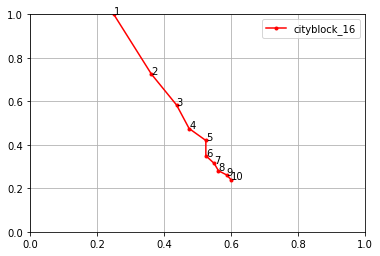

In [ ]:
N_PREDICTIONS = 10                                                              #Esta N es el numero de predicciones que genera cada modelo por query. Por el propio enunciado entregado en clase se entiende que este valor es 10
PRINT_RESULTS = True                                                            #Si lo activamos el programa imprimirá las estadisticas de cada modelo

MODEL_RESULTS_LIST = []
MODEL_NAMES_LIST = []

for file in os.listdir(OUTPUTS_FOLDER):                                         #Por cada archivo de la carpeta que contiene los resultados de cada modelo
  if file.endswith(".txt"):                                                     #Primero comprobamos que el archivo es un .txt (A veces en el notebook me han aparecido archivos raros)
    with open(os.path.join(OUTPUTS_FOLDER, file)) as myfile:                    #Falta el f.close()
      MODEL_NAMES_LIST.append(file[:-4])                                        #Añadimos el nombre del archivo que se procesa a una lista
      count = sum(1 for _ in myfile)                                            #Contamos el numero de filas que tiene el .txt
      N_QUERYS = int((1+count)/12)                                              #para determinar el número de querys que contiene
  
      myfile.seek(0)

      QUERY_PR_LIST = []

      for query in range(N_QUERYS):                                             #Por cada query en el .txt
        next(myfile)                                                            #Saltamos la primera linea
        predictions = [next(myfile) for x in range(N_PREDICTIONS)]              #Guardamos las predicciones en una lista. Las predicciones son del estilo 'ukbench01702.jpg'
        predictions = clean_list(predictions)                                   #Procesamos la lista que contiene las predicciones. Ahora esta lista contiene elementos del estilo '1702' 
        next(myfile)                                                            #Saltamos la ultima linea en blanco
        QUERY_PR_LIST.append(calc_precision_recall(predictions))                #Añadimos las predicciones de esta query a una lista que contiene todas las predicciones de las querys que hace un modelo
      
      MODEL_RESULTS_LIST.append(np.average(QUERY_PR_LIST, axis = 0))            #A partir de la lista que contiene todas las estadisticas de precision/recall para cada query de un modelo calculamos la media de todas las querys para sacar las estadisticas generales del modelo 
      #print(len(QUERY_PR_LIST))                                                #Comment out para ver el numero de querys que esta procesando de cada modelo
    myfile.close()
#print(len(MODEL_RESULTS_LIST))                                                 #Comment out para comprobar el numero de modelos que estamos procesando

plot_precision_recall(MODEL_RESULTS_LIST, MODEL_NAMES_LIST, PRINT_RESULTS)#A partir de la lista que contiene las estadisticas precision/recall de cada modelo generamos una grafica para comparar cada modelo